#Minimos Quadrados


##Importação dos dados para o DataBase



In [ ]:
from sympy import *
from sklearn.linear_model import LinearRegression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
routh = "/content/drive/MyDrive/Sistemas De Controle - Laboratório/Roteiro I/Lab_01C/LAB_1C - Página1.csv"
df = pd.read_csv(routh, ',', na_values = '?')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


##Tratamento dos dados:

In [ ]:
med = df['Média']
Y = df['Tensão Out(v)']

it1 = df['1ª Tempo (s)']
it2 = df['2ª Tempo (s)']
it3 = df['3ª Tempo (s)']
it4 = df['4ª Tempo (s)']
it5 = df['5ª Tempo (s)']

med.head(11)


0     34,072
1     24,344
2     19,288
3     16,408
4     14,682
5     12,828
6     11,572
7     10,650
8      9,894
9      9,181
10     8,634
Name: Média, dtype: object

##Atribuição de Dados 

In [ ]:
def Tdata(vet):
  vetS = []
  for i in range(len(vet)):
    vetS.append(float(str(vet[i]).replace(',','.')))
  return vetS

In [ ]:
t = Tdata(med);
y = Tdata(Y);

In [ ]:
L = 25
d = 0.47625 #em Cm
D = 4.445 #em Cm

In [ ]:
A = ((math.pi)*D*D)/4
print(A)
v = A*L                                   #volume
Q = list(map(lambda tempo: v/tempo , t))  #Vazao
print(Q)
print(y)

15.51791654736087
[11.386120969829236, 15.936079267335758, 20.11343393218694, 23.643827016334818, 26.423369682878473, 30.24227577829917, 33.52470736986016, 36.427034148734435, 39.210421839905166, 42.255518318704034, 44.932582080614054]
[3.0, 3.9, 4.8, 5.7, 6.6, 7.5, 8.4, 9.3, 10.2, 11.1, 12.0]




##Funções para utilizar o MNQ:

In [ ]:
def f(x,a,b):
  z = [];
  for i in range(len(x)):
    z.append(a*x[i]+b);
  return z

def err2(z,y):
  err = [];
  for i in range(len(y)):
    err.append((y[i] - z[i])*(y[i] - z[i]));

  for k in range(len(err)):
    err[k]= np.format_float_scientific(err[k], precision = 3, exp_digits=1)
    err[k] = float(err[k])
  
  #err = sum(err);
  return err;

def MNQ(x,y):
  X = []
  X = np.zeros((len(x),2))
  for (i, j) in enumerate(x):
    X[i] = np.array([j,1])

  a,b = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose().dot(y))

  z = f(x,a,b)
  err = err2(z,y)

  return z, err, 1/a, b

##Teste:


In [ ]:
R_MNQ = MNQ(Q,y)
print(R_MNQ)
X = []
X = np.zeros((len(Q),2))
for (i, j) in enumerate(Q):
  X[i] = np.array([j,1])

reg = LinearRegression().fit(X, y).coef_
reg

([2.594626975052869, 3.829296776146772, 4.962857419104094, 5.92085954615148, 6.675112039655471, 7.711404621021181, 8.602120292520397, 9.389691297016416, 10.144987170587015, 10.971299944893262, 11.697743917851104], [0.1643, 0.004999, 0.02652, 0.04878, 0.005642, 0.04469, 0.04085, 0.008045, 0.003026, 0.01656, 0.09136], 3.6851620518095713, -0.49509358804643)


array([0.27135849, 0.        ])

##Gráfico:

Text(2.1, 6, 'Erro Quadratico             : 4.548e-1')

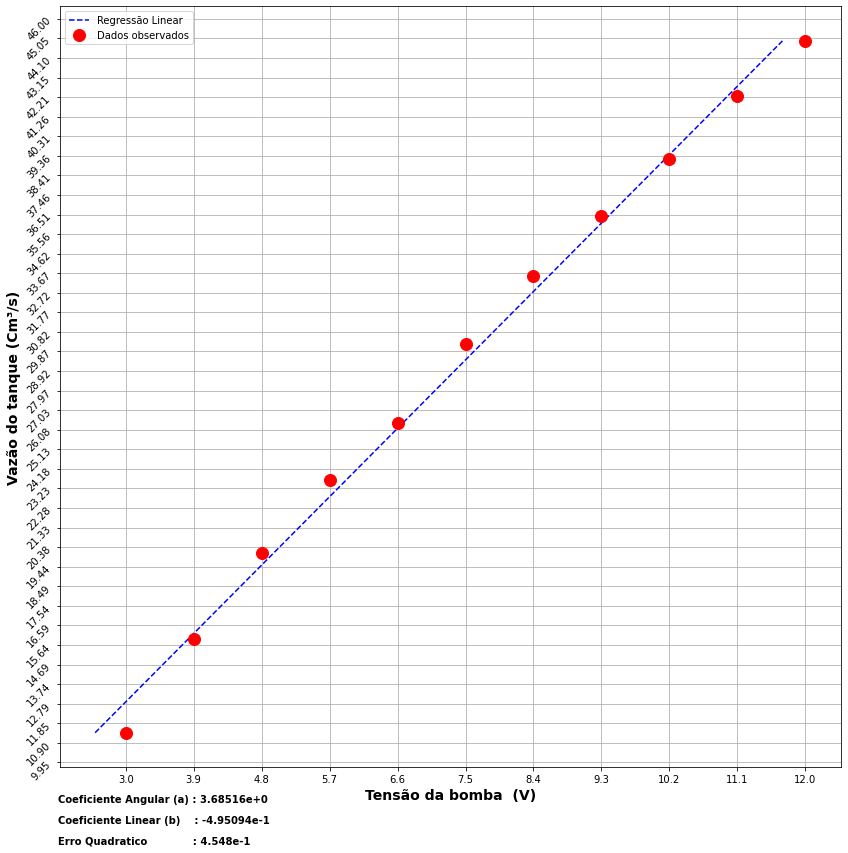

In [ ]:
fig = plt.figure(figsize= (14,14))
#plt.title('Regressão Linear',     fontsize = 18, weight="bold")
plt.ylabel('Vazão do tanque (Cm³/s)',      fontsize = 14, weight="bold")
plt.xlabel('Tensão da bomba  (V)',        fontsize = 14, weight="bold")
plt.grid(True)


plt.yticks(np.linspace(9,46,40),rotation=45)
plt.xticks(np.linspace(1.2,13.8,15))

plt.plot(R_MNQ[0], Q,'b--')

plt.plot(y,Q,"ro",markersize=12)

plt.legend(['Regressão Linear', 'Dados observados'], loc=0)

plt.text(2.1,8,("Coeficiente Angular (a) : "    + str(np.format_float_scientific(R_MNQ[2], precision = 5, exp_digits=1)))  , fontsize = 10, weight="bold")
plt.text(2.1,7,("Coeficiente Linear (b)    : "  + str(np.format_float_scientific(R_MNQ[3], precision = 5, exp_digits=1)))  , fontsize = 10, weight="bold")
plt.text(2.1,6,("Erro Quadratico             : " +    (np.format_float_scientific(sum(R_MNQ[1]), precision = 3, exp_digits=1)))  , fontsize = 10, weight="bold")
#plt.savefig('test.png')

equação diferencial (não-linear) => L = Ax+B

In [ ]:
g = float(980.66)
#F_out = (2*g*L) ** 0.5
a1 = 0.47625
a1 = ((math.pi)*a1*a1)/4
print(a1)
L=15
delta =  Symbol('Delta')
Km    =  R_MNQ[2]
Vp    =  Symbol('Vp')
#g     =  Symbol('g')

Eq(Km*Vp - (a1*(2*g*L)**0.5),delta)

EDO =  Eq( Km*Vp - (a1*(2*g*L)**0.5), 0)
solve(EDO)

0.17813934812021404
<class 'sympy.core.relational.Equality'>


[8.29130949047288]